In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as random
%matplotlib inline
from casadi import *

In [2]:
n = 500           
taux = 1/n              

In [3]:
def tracer_orientation (x,y,theta, r, i):
    if i == 1 :
        plt.arrow(x, y, r*cos(theta),r*sin(theta), width = 0.01, color = 'red' , label = "Axe local suivant x")
        plt.arrow(x, y, r*cos(pi/2+theta),r*sin(pi/2+theta), width = 0.01, color = 'yellow' , label = "Axe local suivant y")
        plt.legend()
    else :
        plt.arrow(x, y, r*cos(theta),r*sin(theta), width = 0.01, color = 'red' )
        plt.arrow(x, y, r*cos(pi/2+theta),r*sin(pi/2+theta), width = 0.01, color = 'yellow' )
    

In [4]:
# Notre fonction contient au totale 5*n  variable où u1, u2, x1, x2 et x3 sont des vecteur de taille n

# Je defini le vecteur :

u1=SX.sym('u1',n)       ## notre vecteur vitesse

u2=SX.sym('u2',n)       ## notre vecteur vitesse angulaire

## Pour les xi ont va entrer nos xi_initial et xi_final

x1=SX.sym('x1',n)       ## notre vecteur des abssices

x2=SX.sym('x2',n)       ## notre vecteur des ordonnées

x3=SX.sym('x3',n)      ## notre vecteur des angles

In [5]:
########################################### exemple 1

C1_1 = 0.2001              
C2_1 = 0.7999


x1_1i = -4                   # condition initiale de x1
x2_1i = -0.9                 # condition initiale de x2
x3_1i = pi              # condition initiale de x3


x1_1f = 0           # condition final de x1
x2_1f = 0.2            # condition final de x2
x3_1f = pi/2         # condition final de x3

In [6]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

u1 = opti.variable(n)
u2 = opti.variable(n)
x1 = opti.variable(n)
x2 = opti.variable(n)
x3 = opti.variable(n)

opti.minimize(   (taux/2)*(C1_1*dot(u1,u1)+C2_1*dot(u2,u2))   )    # ma fonction objetion

# mes fonctions de contrainte d'égalité:

## pour les condition initial
opti.subject_to( x1[0]==x1_1i + 10**(-4))        
opti.subject_to( x2[0]==x2_1i + 10**(-4))
opti.subject_to( x3[0]==x3_1i + 10**(-4))

opti.subject_to( u1[0] == 0.0001 )
opti.subject_to( u2[0] == 0.0001 )

opti.subject_to( u1[-1] == 0.0001)
opti.subject_to( u2[-1] == 0.0001)


## pour les contraintes d'égaliter
opti.subject_to( u1[:n-1]*cos(x3[:n-1])==(x1[1:] + 10**(-4) - x1[:n-1])/taux )
opti.subject_to( u1[:n-1]*sin(x3[:n-1])==(x2[1:] + 10**(-4) - x2[:n-1])/taux )
opti.subject_to( u2[:n-1] ==(x3[1:] + 10**(-4) - x3[:n-1])/taux)

## pour les conditions finales
opti.subject_to( x1[-1]==x1_1f + 10**(-4))
opti.subject_to( x2[-1]==x2_1f + 10**(-4))
opti.subject_to( x3[-1]==x3_1f + 10**(-4))


opti.solver('ipopt')      # suivant la méthode de KKT


sol = opti.solve()




******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:     5499
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1998

Total number of variables............................:     2500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1507
Total number of inequality co

In [7]:
U1_1 = sol.value(u1)
U2_1 = sol.value(u2)
X1_1 = sol.value(x1)
X2_1 = sol.value(x2)
X3_1 = sol.value(x3)

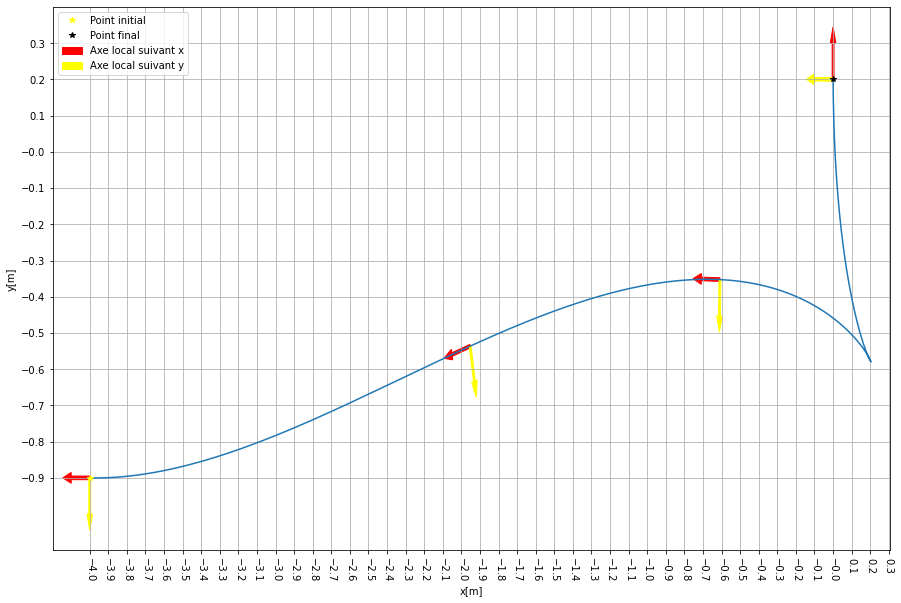

In [8]:
plt.figure(figsize=(15,10))
plt.plot (X1_1,X2_1 )
plt.plot(x1_1i,x2_1i, '*', label = 'Point initial', color = 'yellow')
plt.plot(x1_1f,x2_1f, '*', label = 'Point final', color = 'black')

tracer_orientation (X1_1[0],X2_1[0],X3_1[0], 0.1,0)


tracer_orientation (X1_1[150],X2_1[150],X3_1[150],0.1,0)

tracer_orientation (X1_1[250],X2_1[250],X3_1[250],0.1,0)

tracer_orientation (X1_1[-1],X2_1[-1],X3_1[-1],0.1,1)

plt.xlim(min(X1_1)-0.2, max(X1_1)+0.1)
plt.ylim(min(X2_1)-0.2, max(X2_1)+0.2)


plt.xticks(np.arange(min(X1_1), max(X1_1)+0.1, 0.1),rotation=-90)
plt.yticks(np.arange(min(X2_1),max(X2_1)+0.1, 0.1))


plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.grid(True)
plt.legend()

In [9]:
##################################### Exemple 2

C1_2 = 0.8
C2_2 = 0.2

x1_2i = -4                   # condition initiale de x1
x2_2i = -3.4                 # condition initiale de x2
x3_2i = pi/4              # condition initiale de x3


x1_2f = 0           # condition final de x1
x2_2f = 0            # condition final de x2
x3_2f = pi/2         # condition final de x3

In [10]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

u1 = opti.variable(n)
u2 = opti.variable(n)
x1 = opti.variable(n)
x2 = opti.variable(n)
x3 = opti.variable(n)

opti.minimize(   (taux/2)*(C1_1*dot(u1,u1)+C2_1*dot(u2,u2))   )    # ma fonction objetion

# mes fonctions de contrainte d'égalité:

## pour les condition initial
opti.subject_to( x1[0]==x1_2i + 10**(-4))        
opti.subject_to( x2[0]==x2_2i + 10**(-4))
opti.subject_to( x3[0]==x3_2i + 10**(-4))

opti.subject_to( u1[0] == 0.0001 )
opti.subject_to( u2[0] == 0.0001 )

opti.subject_to( u1[-1] == 0.0001)
opti.subject_to( u2[-1] == 0.0001)


## pour les contraintes d'égaliter
opti.subject_to( u1[:n-1]*cos(x3[:n-1])==(x1[1:] + 10**(-4) - x1[:n-1])/taux )
opti.subject_to( u1[:n-1]*sin(x3[:n-1])==(x2[1:] + 10**(-4) - x2[:n-1])/taux )
opti.subject_to( u2[:n-1] ==(x3[1:] + 10**(-4) - x3[:n-1])/taux)

## pour les conditions finales
opti.subject_to( x1[-1]==x1_2f + 10**(-4))
opti.subject_to( x2[-1]==x2_2f + 10**(-4))
opti.subject_to( x3[-1]==x3_2f + 10**(-4))


opti.solver('ipopt')      # suivant la méthode de KKT


sol = opti.solve()



This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:     5499
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1998

Total number of variables............................:     2500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1507
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [11]:
U1_2 = sol.value(u1)
U2_2 = sol.value(u2)
X1_2 = sol.value(x1)
X2_2 = sol.value(x2)
X3_2 = sol.value(x3)

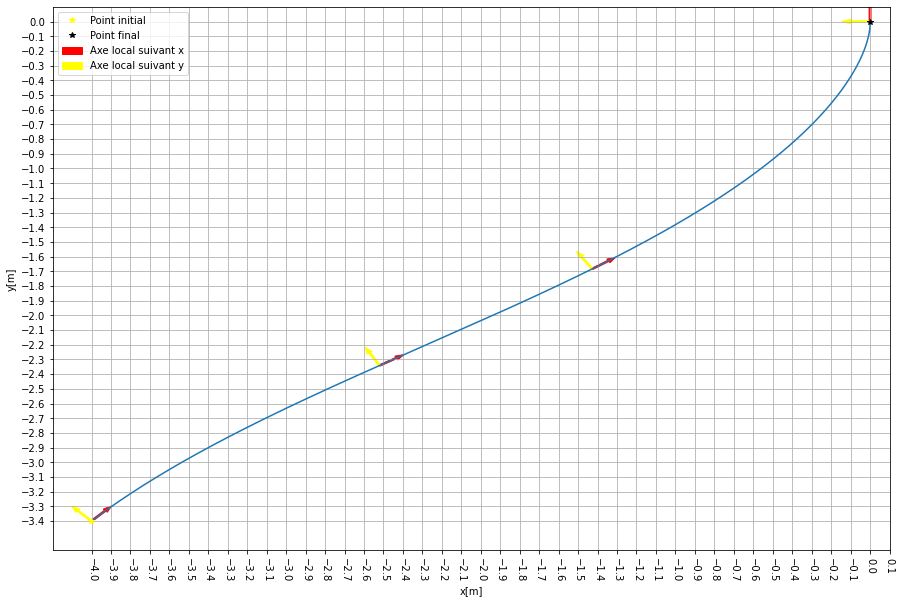

In [12]:
plt.figure(figsize = (15,10))
plt.plot (X1_2,X2_2 )

tracer_orientation (X1_2[0],X2_2[0],X3_2[0],0.1,0)

tracer_orientation (X1_2[150],X2_2[150],X3_2[150],0.1,0)

tracer_orientation (X1_2[250],X2_2[250],X3_2[250],0.1,0)

tracer_orientation (X1_2[-1],X2_2[-1],X3_2[-1],0.1,1)


plt.plot(x1_2i,x2_2i, '*', label = 'Point initial', color = 'yellow')
plt.plot(x1_2f,x2_2f, '*', label = 'Point final', color = 'black')

plt.xlim(X1_2[0]-0.2, max(X1_2)+0.1)
plt.ylim(X2_2[0]-0.2, max(X2_2)+0.1)


plt.xticks(np.arange(X1_2[0], max(X1_2)+0.1, 0.1), rotation=-90)
plt.yticks(np.arange(X2_2[0], max(X2_2)+0.1, 0.1))
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.grid(True)
plt.legend()